In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv("crop_recommendation.csv")
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [9]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [11]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [12]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [13]:
data = df.drop(['N', 'P', 'K', 'ph', 'rainfall', 'label'], axis = 1)

In [14]:
data

,temperature,humidity
0,20.879744,82.002744
1,21.770462,80.319644
2,23.004459,82.320763
3,26.491096,80.158363
4,20.130175,81.604873
...,...,...
2195,26.774637,66.413269
2196,27.417112,56.636362
2197,24.131797,67.225123
2198,26.272418,52.127394


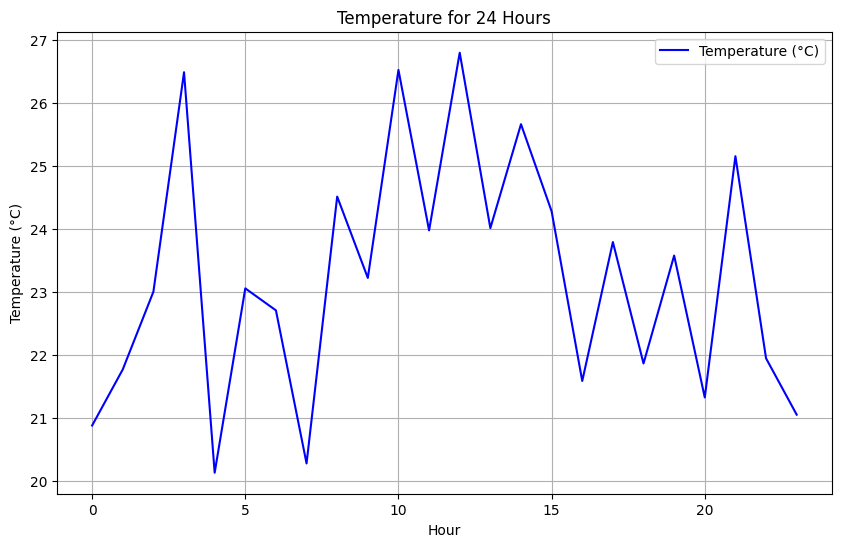

In [25]:
# # Plot Temperature for the first 24 hours (1 day)
plt.figure(figsize=(10, 6))
day_temperature = data['temperature'][:24]  # Taking first 24 rows for one day of data
plt.plot(day_temperature, label='Temperature (°C)', color='blue')
plt.title('Temperature for 24 Hours')
plt.xlabel('Hour')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

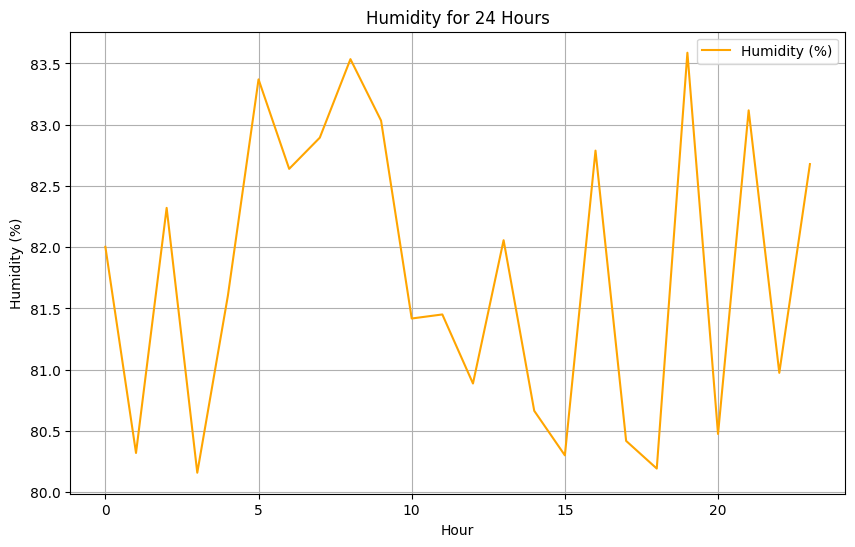

In [27]:

# Plot Humidity for the first 24 hours (1 day)
plt.figure(figsize=(10, 6))
day_humidity = data['humidity'][:24]  # Taking first 24 rows for one day of data
plt.plot(day_humidity, label='Humidity (%)', color='orange')
plt.title('Humidity for 24 Hours')
plt.xlabel('Hour')
plt.ylabel('Humidity (%)')
plt.legend()
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

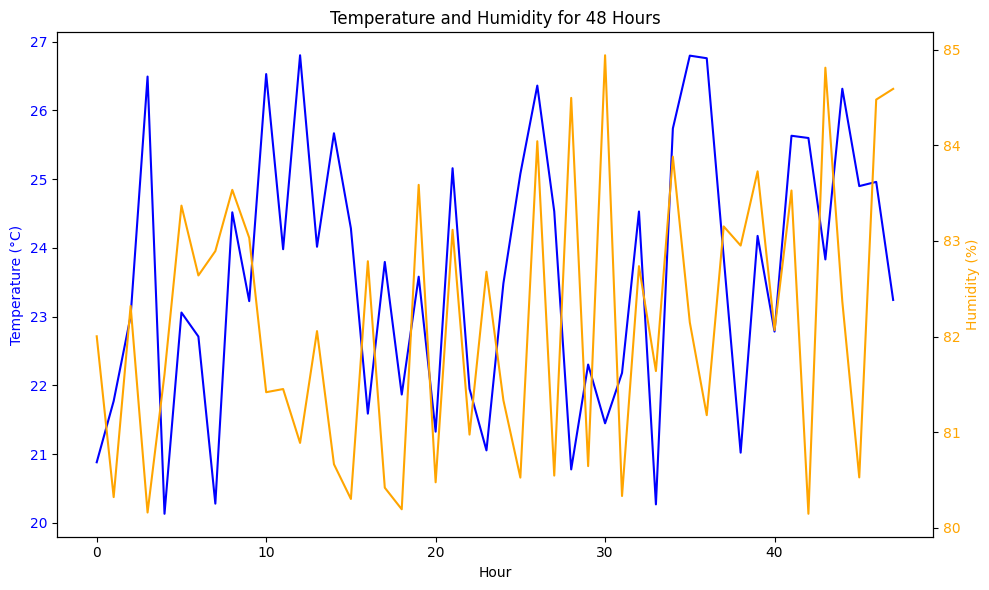

In [42]:
# Plot Temperature and Humidity for 48 hours (2 days)
plt.figure(figsize=(10, 6))
two_day_temperature = data['temperature'][:48]  # Taking first 48 rows for two days
two_day_humidity = data['humidity'][:48]

# Create a subplot for dual-axis plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Temperature on the first axis
ax1.plot(two_day_temperature, label='Temperature (°C)', color='blue')
ax1.set_xlabel('Hour')
ax1.set_ylabel('Temperature (°C)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create another axis for Humidity
ax2 = ax1.twinx()
ax2.plot(two_day_humidity, label='Humidity (%)', color='orange')
ax2.set_ylabel('Humidity (%)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Set the title and show the plot
plt.title('Temperature and Humidity for 48 Hours')
fig.tight_layout()
plt.show()


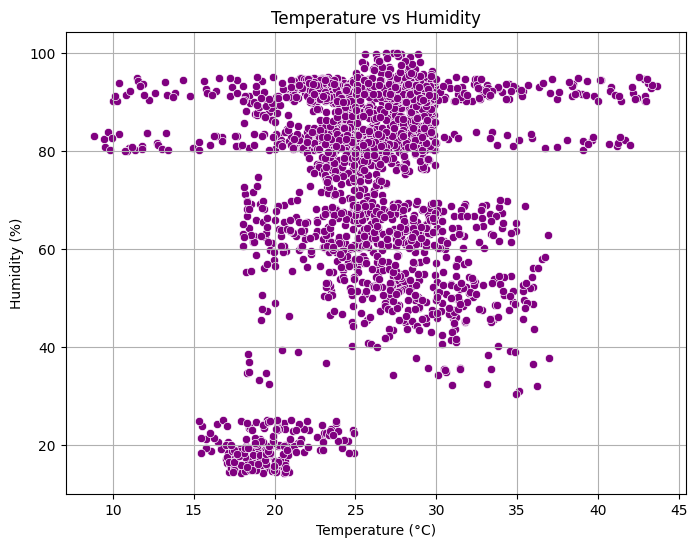

In [37]:
# Scatter plot for Temperature vs Humidity
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['temperature'], y=data['humidity'], color='purple')
plt.title('Temperature vs Humidity')
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.show()

In [39]:
# Advanced: Using a rolling window for analysis (e.g., 7-hour moving average)
data['temp_rolling'] = data['temperature'].rolling(window=7).mean()
data['humidity_rolling'] = data['humidity'].rolling(window=7).mean()


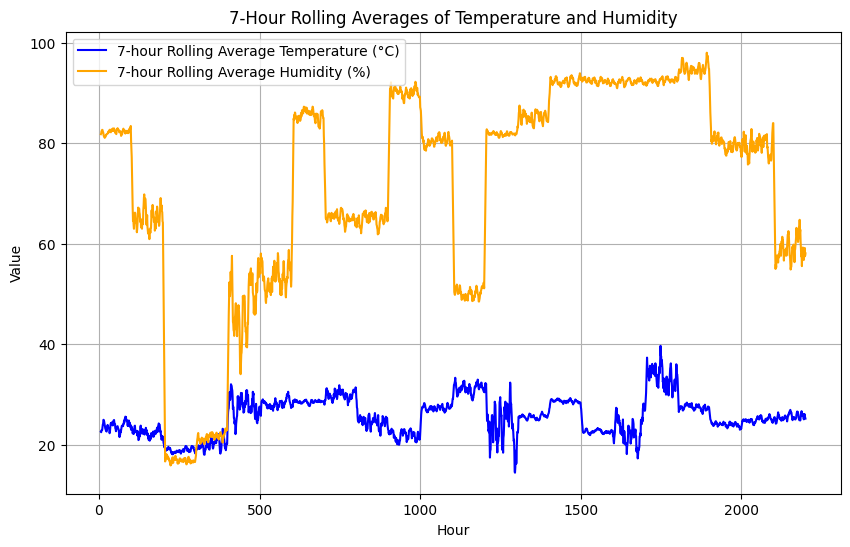

In [40]:

# Plot the rolling averages
plt.figure(figsize=(10, 6))
plt.plot(data['temp_rolling'], label='7-hour Rolling Average Temperature (°C)', color='blue')
plt.plot(data['humidity_rolling'], label='7-hour Rolling Average Humidity (%)', color='orange')
plt.title('7-Hour Rolling Averages of Temperature and Humidity')
plt.xlabel('Hour')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
x = data["temperature"]
y = data["humidity"]

In [16]:
x.skew()

np.float64(0.18493273421137887)

In [17]:
y.skew()

np.float64(-1.0917079195808679)

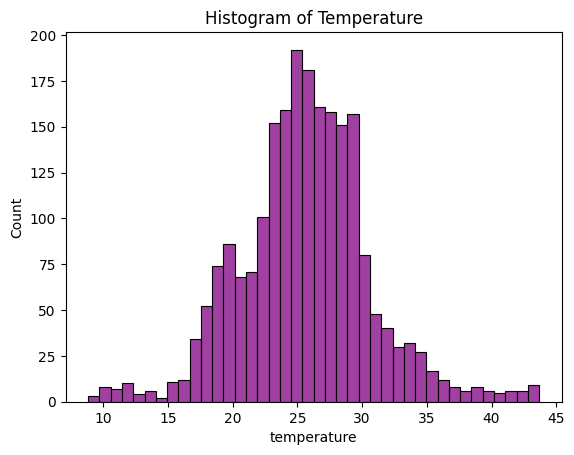

In [18]:
sns.histplot(x, color='Purple')
plt.title('Histogram of Temperature')
plt.show()

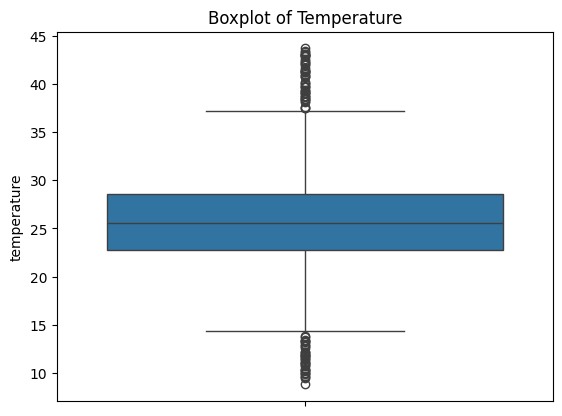

In [19]:
sns.boxplot(x)
plt.title('Boxplot of Temperature')
plt.show()

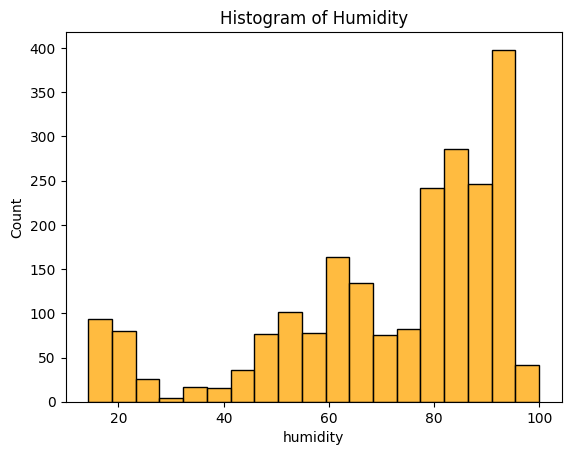

In [20]:
sns.histplot(y, color='Orange')
plt.title('Histogram of Humidity')
plt.show()

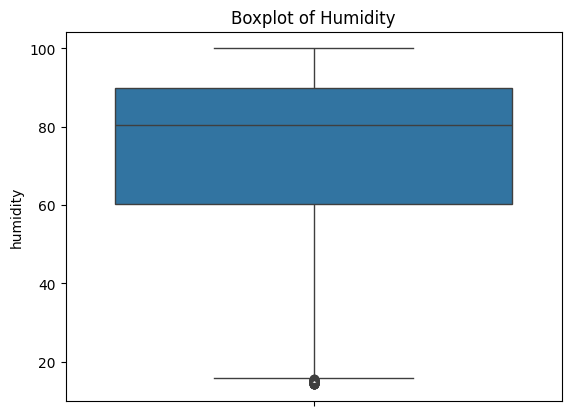

In [21]:
sns.boxplot(y)
plt.title('Boxplot of Humidity')
plt.show()

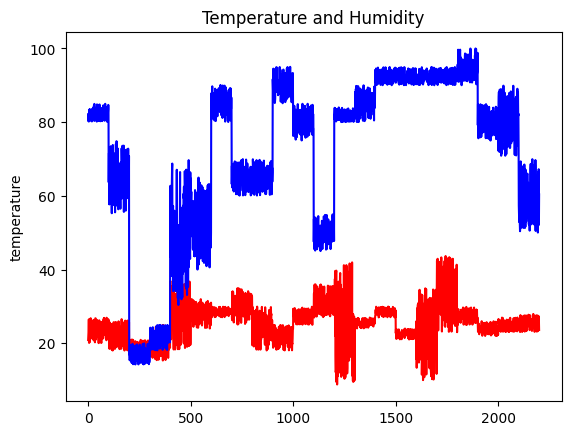

In [22]:
sns.lineplot(x, color = "red")
sns.lineplot(y, color = "blue")
plt.title("Temperature and Humidity")
plt.show()

In [23]:
data.corr()

,temperature,humidity
temperature,1.00000,0.20532
humidity,0.20532,1.00000
